# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
import pandas as pd
import scipy
import sympy as sym
import seaborn as sns
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [2]:
def Himmelblau(x):
# Himmelblau's function
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

In [3]:
bounds = [(-5, 5), (-5, 5)]
strategy = ['best1bin','best1exp','rand1exp', 'randtobest1exp', 
                'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 
                'best2bin', 'rand2bin', 'rand1bin']
strategy_df = pd.DataFrame({'method':[], 'iterations':[]})

for str_ in strategy:
    
    result = differential_evolution(Himmelblau, bounds, strategy=str_, seed=40)
    new_row = {'method':str_, 'iterations':result.nit}
    strategy_df = strategy_df.append(new_row, ignore_index=True)

In [4]:
# метод с наименьшим кол-вом итераций
strategy_df[strategy_df['iterations']== np.min(strategy_df.iterations)]

,method,iterations
0,best1bin,111.0


In [5]:
popsize_df = pd.DataFrame({'popsize':[], 'iterations':[]})
for i in range(1,25,1):
    result = differential_evolution(Himmelblau, bounds, strategy='best1bin',popsize=i, seed=40)
    new_row = {'popsize':i, 'iterations':result.nit}
    popsize_df = popsize_df.append(new_row, ignore_index=True)

In [6]:
#объем популяции с наименьшим кол-вом итераций
popsize_df[popsize_df['iterations']==popsize_df['iterations'].min()]

,popsize,iterations
0,1.0,6.0
1,2.0,6.0


In [7]:
tolerance_df = pd.DataFrame({'tolerance':[], 'iterations':[]})
for i in range(1,9,1):
    result = differential_evolution(Himmelblau, bounds, strategy='best1bin',popsize=2, tol=1/10**i, seed=40)
    new_row = {'tolerance':1/10**i, 'iterations':result.nit}
    tolerance_df = tolerance_df.append(new_row, ignore_index=True)

In [8]:
tolerance_df

,tolerance,iterations
0,1.000000e-01,4.0
1,1.000000e-02,6.0
2,1.000000e-03,49.0
3,1.000000e-04,73.0
4,1.000000e-05,79.0
5,1.000000e-06,83.0
6,1.000000e-07,83.0
7,1.000000e-08,84.0


При уменьшение допуска схождения метода кол-во итераций возрастает, но после 1е-5 происходит резкий скачек.    
Дальнейшее уменьшение допуска слабо влияет на кол-во итераций.
Для дальнейшего исследования оставим tol = 1e-3

In [9]:
mut_df = pd.DataFrame({'mutation':[], 'iterations':[]})

for mut in np.linspace(1e-3, 1.99, num = 50):
    result = differential_evolution(Himmelblau, bounds, strategy='best1bin', 
                                    popsize=3, tol=1e-3, mutation=mut, seed=40)
    new_row = {'mutation':i, 'iterations':result.nit}
    mut_df = mut_df.append(new_row, ignore_index=True)

In [10]:
mut_df.head()

,mutation,iterations
0,8.0,3.0
1,8.0,4.0
2,8.0,4.0
3,8.0,4.0
4,8.0,3.0


Не совсем понял на что влияет этот коэффициент. 

In [11]:
recomb_df = pd.DataFrame({'recomb':[], 'iterations':[]})
for i in np.linspace(0, 1, num = 50):
    result = differential_evolution(Himmelblau, bounds, strategy='best1bin', 
                                    popsize=3, tol=1e-2, recombination=i, seed=40)
    new_row = {'recomb':i, 'iterations':result.nit}
    recomb_df = recomb_df.append(new_row, ignore_index=True)

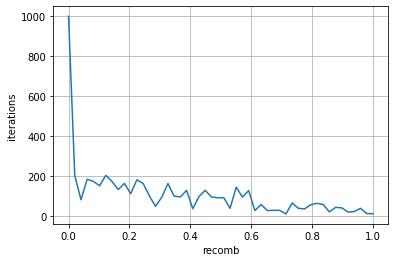

In [12]:
sns.lineplot(data = recomb_df, x = recomb_df.recomb, y=recomb_df.iterations)
plt.grid()

Посмотрим ближе, отбросив первые 5 значений

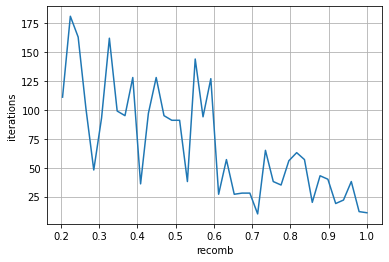

In [13]:
sns.lineplot(data = recomb_df.loc[10:, :], x = recomb_df.loc[5:, :].recomb, y=recomb_df.loc[10:, :].iterations)
plt.grid()

После 0.9 снижение не значительно.  

In [14]:
result_immediate = differential_evolution(Himmelblau, bounds, strategy='best1bin', 
                                popsize=3, tol=1e-2, recombination=0.9, updating='immediate', seed=40)
result_deferred = differential_evolution(Himmelblau, bounds, strategy='best1bin', 
                                popsize=3, tol=1e-2, recombination=0.9, updating='deferred', seed=40)
print(result_immediate, '\n')
print(result_deferred)

     fun: 3.899553682992228e-15
     jac: array([-8.92877896e-08,  3.85479876e-08])
 message: 'Optimization terminated successfully.'
    nfev: 264
     nit: 40
 success: True
       x: array([-3.77931026, -3.283186  ]) 

     fun: 9.046394170352651e-13
     jac: array([1.67520431e-06, 7.66959858e-06])
 message: 'Optimization terminated successfully.'
    nfev: 150
     nit: 20
 success: True
       x: array([2.99999995, 2.00000025])


Выбираем метод immediate, который обновляет вектор лучшего решения в течении одного поколения

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [15]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [16]:
strategy = ['best1bin','best1exp','rand1exp', 'randtobest1exp', 
                'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 
                'best2bin', 'rand2bin', 'rand1bin']
strategy_df = pd.DataFrame({'method':[], 'iterations':[]})

for str_ in strategy:
    
    result = differential_evolution(Himmelblau, bounds, strategy=str_, seed=42)
    new_row = {'method':str_, 'iterations':result.nit}
    strategy_df = strategy_df.append(new_row, ignore_index=True)

In [17]:
# метод с наименьшим кол-вом итераций
strategy_df[strategy_df['iterations']== np.min(strategy_df.iterations)]

,method,iterations
0,best1bin,98.0


In [18]:
popsize_df = pd.DataFrame({'popsize':[], 'iterations':[]})
for i in range(1,25,1):
    result = differential_evolution(Himmelblau, bounds, strategy='best1bin',popsize=i, seed=42)
    new_row = {'popsize':i, 'iterations':result.nit}
    popsize_df = popsize_df.append(new_row, ignore_index=True)

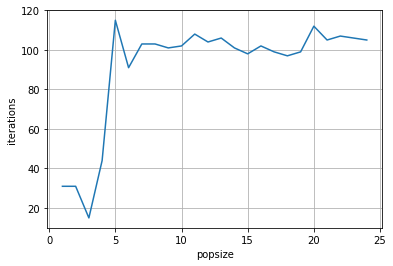

In [19]:
sns.lineplot(data=popsize_df, x=popsize_df.popsize, y=popsize_df.iterations)
plt.grid()

In [20]:
#объем популяции с наименьшим кол-вом итераций
popsize_df[popsize_df['iterations']==popsize_df['iterations'].min()]

,popsize,iterations
2,3.0,15.0


In [21]:
tolerance_df = pd.DataFrame({'tolerance':[], 'iterations':[]})
for i in range(1,9,1):
    result = differential_evolution(Himmelblau, bounds, strategy='best1bin',popsize=3, tol=1/10**i, seed=42)
    new_row = {'tolerance':1/10**i, 'iterations':result.nit}
    tolerance_df = tolerance_df.append(new_row, ignore_index=True)

In [22]:
tolerance_df

,tolerance,iterations
0,1.000000e-01,10.0
1,1.000000e-02,15.0
2,1.000000e-03,69.0
3,1.000000e-04,83.0
4,1.000000e-05,143.0
5,1.000000e-06,259.0
6,1.000000e-07,259.0
7,1.000000e-08,259.0


In [23]:
recomb_df = pd.DataFrame({'recomb':[], 'iterations':[]})
for i in np.linspace(0, 1, num = 50):
    result = differential_evolution(Himmelblau, bounds, strategy='best1bin', 
                                    popsize=3, tol=1e-2, recombination=i, seed=42)
    new_row = {'recomb':i, 'iterations':result.nit}
    recomb_df = recomb_df.append(new_row, ignore_index=True)

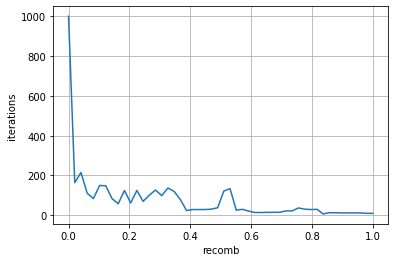

In [24]:
sns.lineplot(data = recomb_df, x = recomb_df.recomb, y=recomb_df.iterations)
plt.grid()

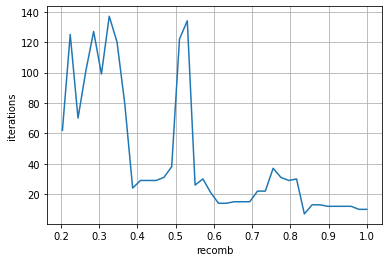

In [25]:
sns.lineplot(data = recomb_df.loc[10:, :], x = recomb_df.loc[5:, :].recomb, y=recomb_df.loc[10:, :].iterations)
plt.grid()

In [26]:
result_immediate = differential_evolution(Himmelblau, bounds, strategy='best1bin', 
                                popsize=3, tol=1e-2, recombination=0.9, updating='immediate', seed=42)
result_deferred = differential_evolution(Himmelblau, bounds, strategy='best1bin', 
                                popsize=3, tol=1e-2, recombination=0.9, updating='deferred', seed=42)
print(result_immediate, '\n')
print(result_deferred)

     fun: 6.868010459107674e-16
     jac: array([7.96537192e-08, 9.65880663e-09])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 12
 success: True
       x: array([3., 2.]) 

     fun: 2.3047019572535486e-15
     jac: array([-7.43503698e-08,  3.28115455e-07])
 message: 'Optimization terminated successfully.'
    nfev: 246
     nit: 36
 success: True
       x: array([-3.77931026, -3.28318599])
